In [2]:
import pandas as pd
import numpy as np

In [3]:
filename = '/ourdisk/hpc/geocarb/vishnupk/xiao_data_12.pkl'
df = pd.read_pickle(filename)

FileNotFoundError: [Errno 2] No such file or directory: '/ourdisk/hpc/geocarb/vishnupk/xiao_data_12.pkl'

In [ ]:
df.head()

,XC,EM,lat,lon
0,"[[[7.6820374, 7.6820383, 7.6826544, 7.682411, ...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[[22.551605, 22.580147, 22.60859, 22.636887, ...","[[[-122.23602, -122.127335, -122.01857, -121.9..."
1,"[[[7.750267, 7.7502675, 7.7518997, 7.751155, 7...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[[22.551605, 22.580147, 22.60859, 22.636887, ...","[[[-122.23602, -122.127335, -122.01857, -121.9..."
2,"[[[7.761965, 7.7619653, 7.7620063, 7.762361, 7...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[[22.551605, 22.580147, 22.60859, 22.636887, ...","[[[-122.23602, -122.127335, -122.01857, -121.9..."
3,"[[[7.769256, 7.769256, 7.7707577, 7.769789, 7....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[[22.551605, 22.580147, 22.60859, 22.636887, ...","[[[-122.23602, -122.127335, -122.01857, -121.9..."
4,"[[[7.706072, 7.7060895, 7.7054386, 7.704811, 7...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[[22.551605, 22.580147, 22.60859, 22.636887, ...","[[[-122.23602, -122.127335, -122.01857, -121.9..."


In [ ]:
X = df['XC'] 
Y = df['EM'] 

In [ ]:
X = X.to_list()
X = np.ma.getdata(X)
X = X[:,0,:,:]
X = X.astype('float32') 

In [ ]:
flat_array = np.ravel(X)

In [ ]:
X = (X - np.min(X))/(np.max(X) - np.min(X))

0.0

In [ ]:
# Normalize 
np.mean(flat_array)

7.745828

In [ ]:
np.min(flat_array)

4.87101

In [ ]:
tres = 150 
Y = Y.to_list()
Y = np.array(Y)

In [ ]:
np.min(Y)

-3.942135e-06

In [ ]:
np.mean(Y)

8.605324

In [ ]:
np.max(Y)

5136.5103

In [ ]:
Y = np.where(Y > tres, 1, 0)
Y = Y.astype('float32')  


In [ ]:
len(Y.ravel())

42635320

In [ ]:
np.sum(Y)

325780.0

In [ ]:
# Split data 
test_size = 0.2
test_split = int(len(X)*test_size)

In [ ]:
test_split

72

In [ ]:
X_resized = []
Y_resized = []
for x,y in zip(X,Y):
    X_resized.append(np.resize(x, (256,256)))
    Y_resized.append(np.resize(x, (256,256)))

In [ ]:
X_new = []
for i in range(5, len(X_resized)):
    X_new.append(np.array(X_resized[i-5:i]))

y_new = Y_resized[5:len(Y_resized)]

In [ ]:
len(X_new)

359

In [ ]:
len(y_new)

359

In [ ]:
x_train = X_new[:-(2*test_split)]
y_train = y_new[:-(2*test_split)]

x_val = X_new[-(2*test_split):-(test_split)]
y_val = y_new[-(2*test_split):-(test_split)]

x_test = X_new[-(test_split):]
y_test = y_new[-(test_split):]


In [ ]:
print(len(x_train))
print(len(x_val))
print(len(x_test))


215
72
72


(256, 256)

In [ ]:
len(X_new)
len(y_new)

359

In [ ]:
from sklearn.model_selection import train_test_split
test_size = 0.2 
random_state = 42
x_train , x_rem, y_train, y_rem = train_test_split(X, y, test_size = test_size*2, random_state = random_state) 
    

In [ ]:
import tensorflow as tf
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

In [ ]:
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(8)

In [ ]:
train_dataset.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 265, 442), dtype=tf.float32, name=None), TensorSpec(shape=(None, 265, 442), dtype=tf.int64, name=None))>

# Additional testing on the created dataset (Local)

In [3]:
import tensorflow as tf

2023-08-24 15:37:49.088445: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-24 15:37:49.328944: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [4]:
data_path = '/home/vishnu/Documents/geocarb/methane/12'

In [5]:
train_dataset = tf.data.Dataset.load(data_path + '/train.tfrecords')
validation_dataset = tf.data.Dataset.load(data_path + '/validation.tfrecords')
test_dataset = tf.data.Dataset.load(data_path + '/test.tfrecords')

2023-08-24 15:37:54.056185: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-24 15:37:54.094232: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-24 15:37:54.094360: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-08-24 15:37:54.094817: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFl

In [7]:
for example in train_dataset.take(1):
  a = example

In [17]:
a[1].numpy()
len(np.where(a[1].numpy().nonzero()))

2

In [ ]:
#### Realized that no hotspots listed with this threshold. Hence, need to change the threshold

# Find out the threshold for the data

In [20]:
import pickle
data_path = '/home/vishnu/Documents/geocarb/methane/pkl/xiao_data_12.pkl'
with open(data_path, 'rb') as f:
    df = pickle.load(f)
    
# df = read_pickle(data_path)

In [23]:
XC = df['XC']
EM = df['EM']

In [37]:
values = XC[312].data

In [35]:
mask = XC[12].mask

In [38]:
print(np.min(values))
print(np.mean(values))
print(np.max(values))



2.750727
7.5037723
12.538384


In [39]:
mini = []
maxi = []
meanie = []

for ex in XC:
    mini.append(np.min(ex.data))
    maxi.append(np.max(ex.data))
    meanie.append(np.mean(ex.data))

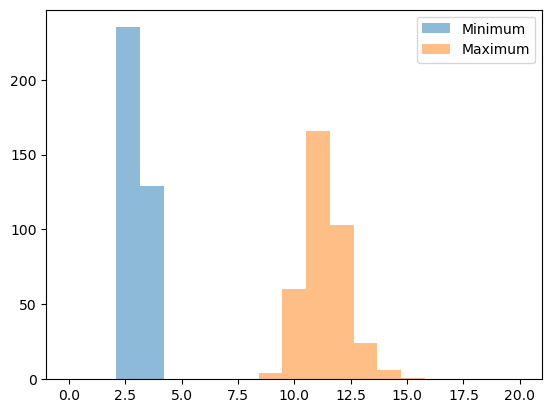

In [58]:
bins = np.linspace(0, 20, 20)
plt.hist(mini, bins, alpha=0.5, label='Minimum')
# plt.hist(meanie, bins, alpha=0.5, label='Means')
plt.hist(maxi, bins, alpha=0.5, label='Maximum')
plt.legend(loc='upper right')
plt.show()

In [65]:
np.mean(EM[1].data)

8.605332

In [75]:
mini = []
maxi = []
meanie = []
emissions = []
for ex in EM:
    mini.append(np.min(ex.data))
    maxi.append(np.max(ex.data))
    meanie.append(np.mean(ex.data))
    emissions.append(ex.data)

In [88]:
emi = emissions[0]
new_data = np.where(emi > 1, emi, np.nan)

In [107]:
new_data = new_data.flatten()

### Plot the emissions data from 1000 - 6000

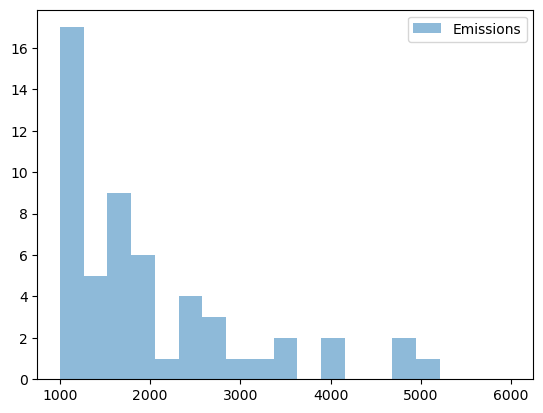

In [110]:
bins = np.linspace(1000, 6000, 20)
plt.hist(new_data,bins, alpha=0.5, label='Emissions')
plt.legend(loc='upper right')
plt.show()

### Plot the emissions data 100 - 1000

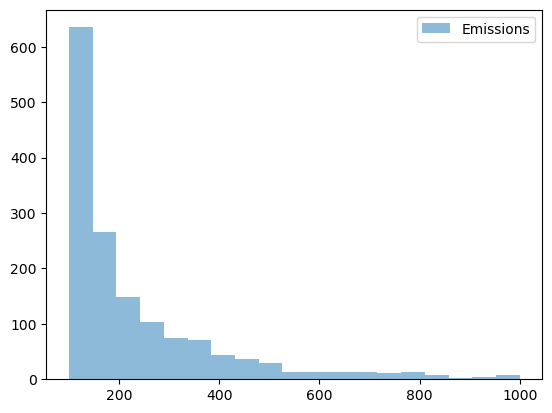

In [109]:
bins = np.linspace(100, 1000, 20)
plt.hist(new_data,bins, alpha=0.5, label='Emissions')
plt.legend(loc='upper right')
plt.show()

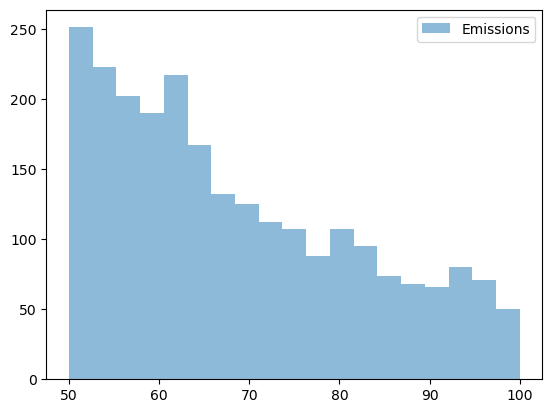

In [111]:
bins = np.linspace(50, 100, 20)
plt.hist(new_data,bins, alpha=0.5, label='Emissions')
plt.legend(loc='upper right')
plt.show()

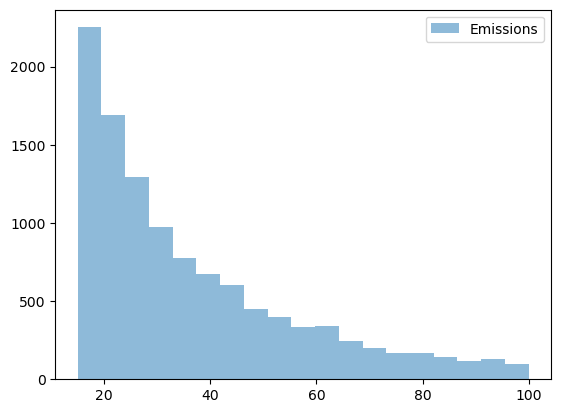

In [112]:
bins = np.linspace(15, 100, 20)
plt.hist(new_data,bins, alpha=0.5, label='Emissions')
plt.legend(loc='upper right')
plt.show()

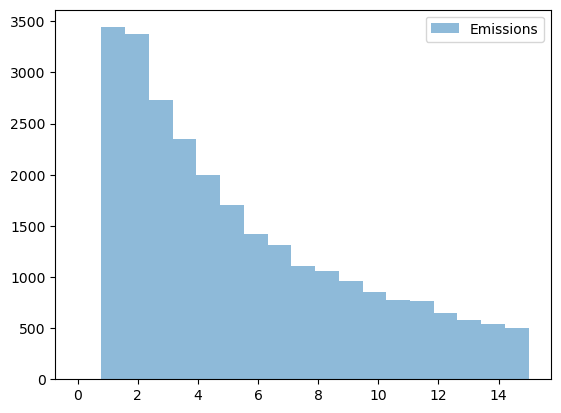

In [113]:
bins = np.linspace(0, 15, 20)
plt.hist(new_data,bins, alpha=0.5, label='Emissions')
plt.legend(loc='upper right')
plt.show()

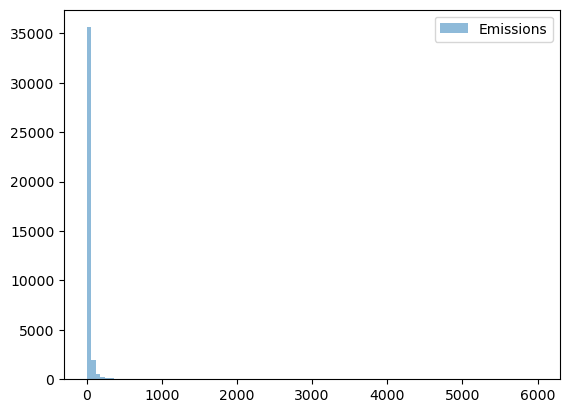

In [115]:
bins = np.linspace(0, 6000, 100)
plt.hist(new_data, bins, alpha=0.5, label='Emissions')
plt.legend(loc='upper right')
plt.show()

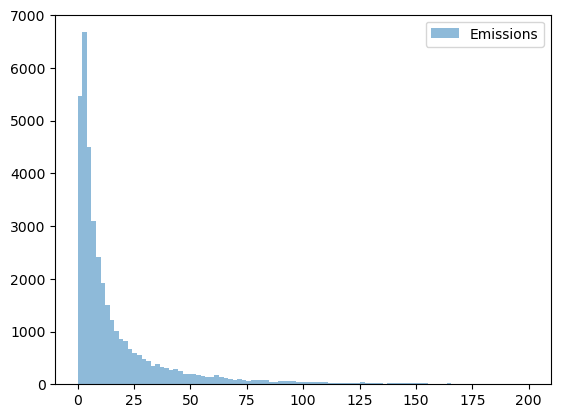

In [118]:
bins = np.linspace(0, 200, 100)
plt.hist(new_data, bins, alpha=0.5, label='Emissions')
plt.legend(loc='upper right')
plt.show()

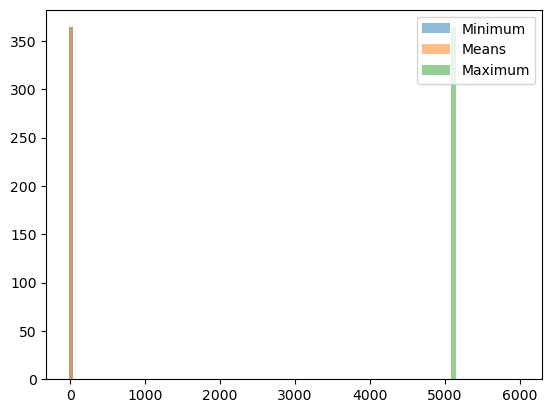

In [73]:
bins = np.linspace(-20, 6000, 100)
plt.hist(mini, bins, alpha=0.5, label='Minimum')
plt.hist(meanie, bins, alpha=0.5, label='Means')
plt.hist(maxi, bins, alpha=0.5, label='Maximum')
plt.legend(loc='upper right')
plt.show()